In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=(200)

### Q.2 Salary_hike -> Build a prediction model for Salary_hike

In [2]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Data Visualization and EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

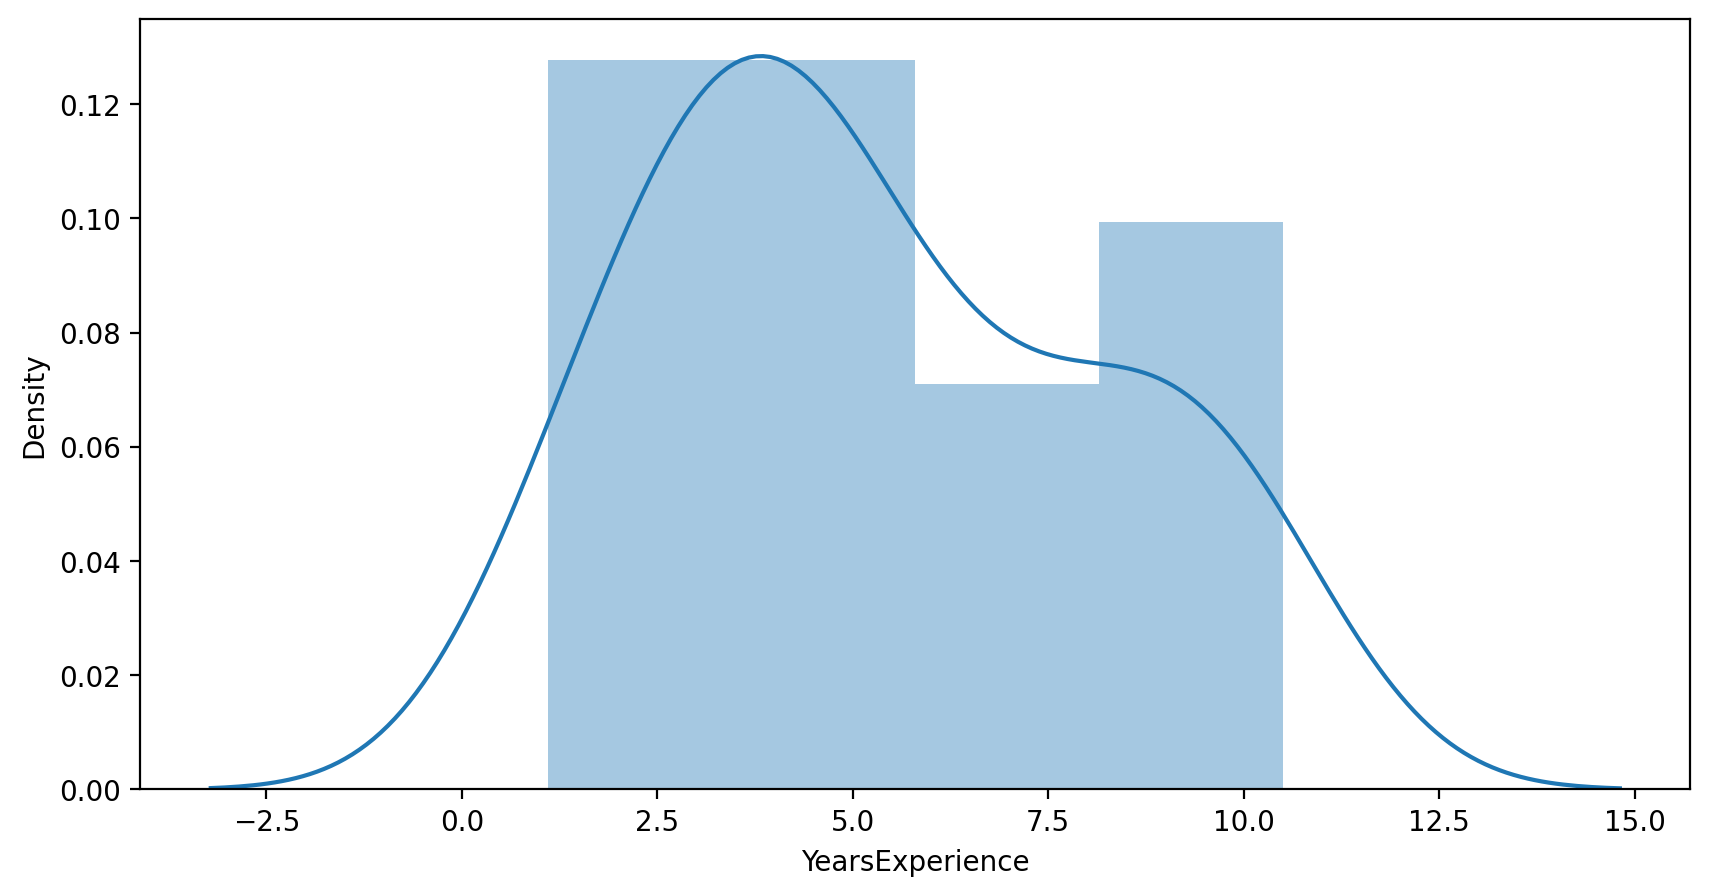

In [5]:
sns.distplot(df['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

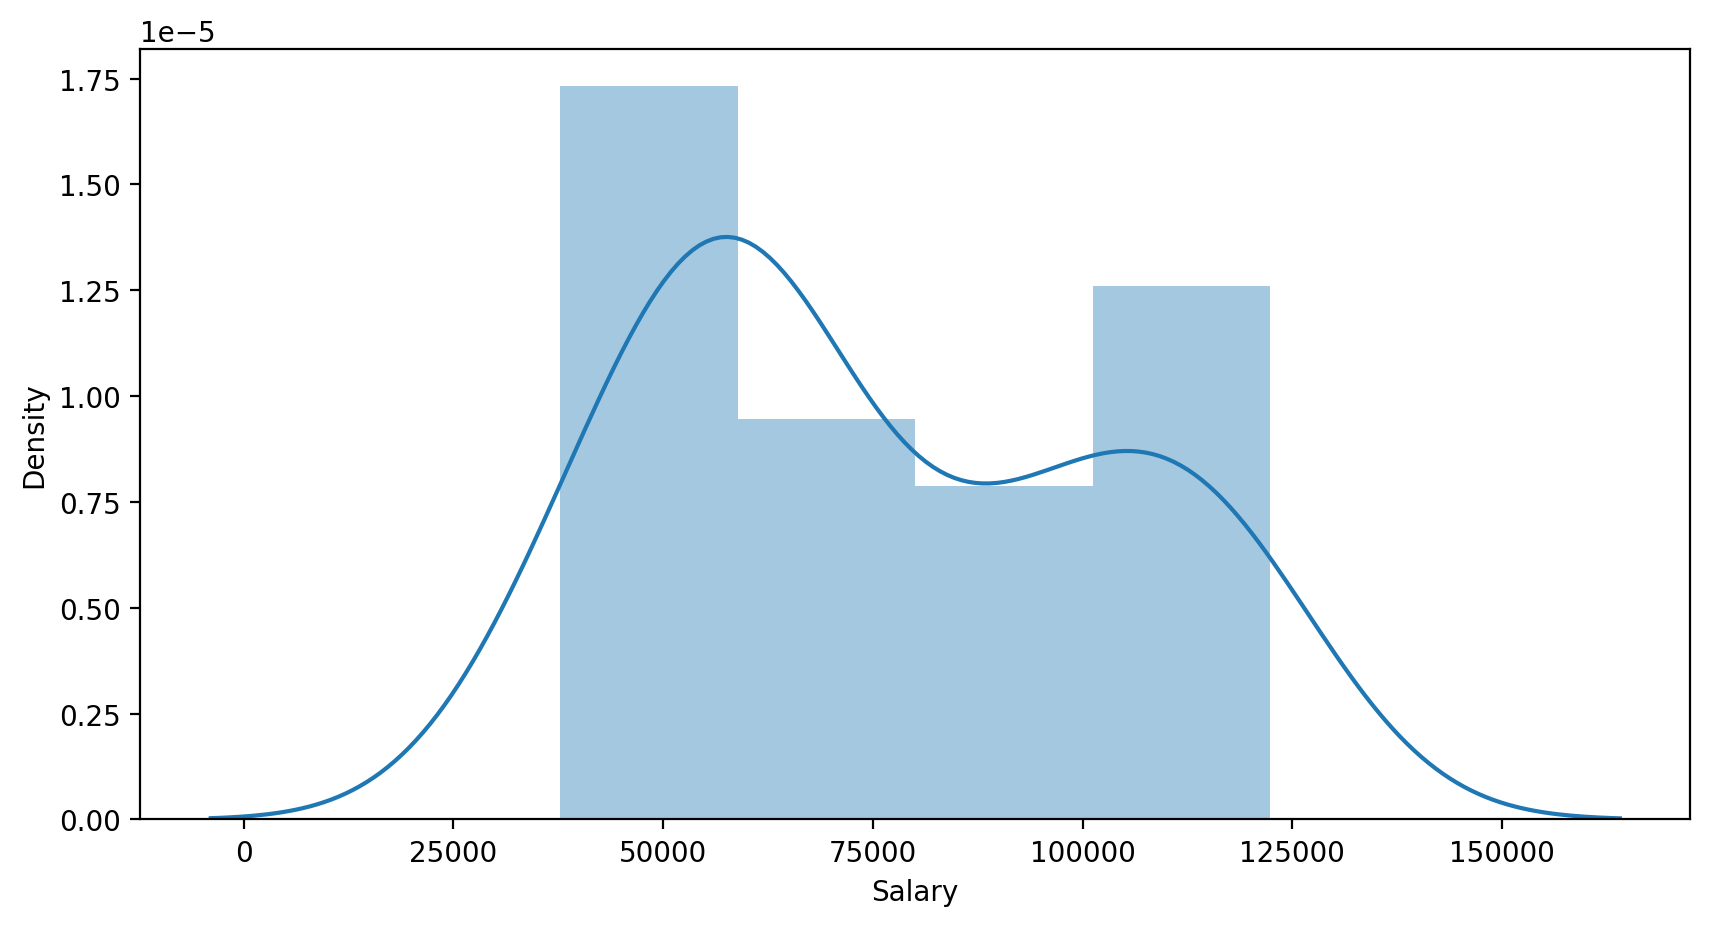

In [6]:
sns.distplot(df['Salary'])

### Correlation Analysis

In [7]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

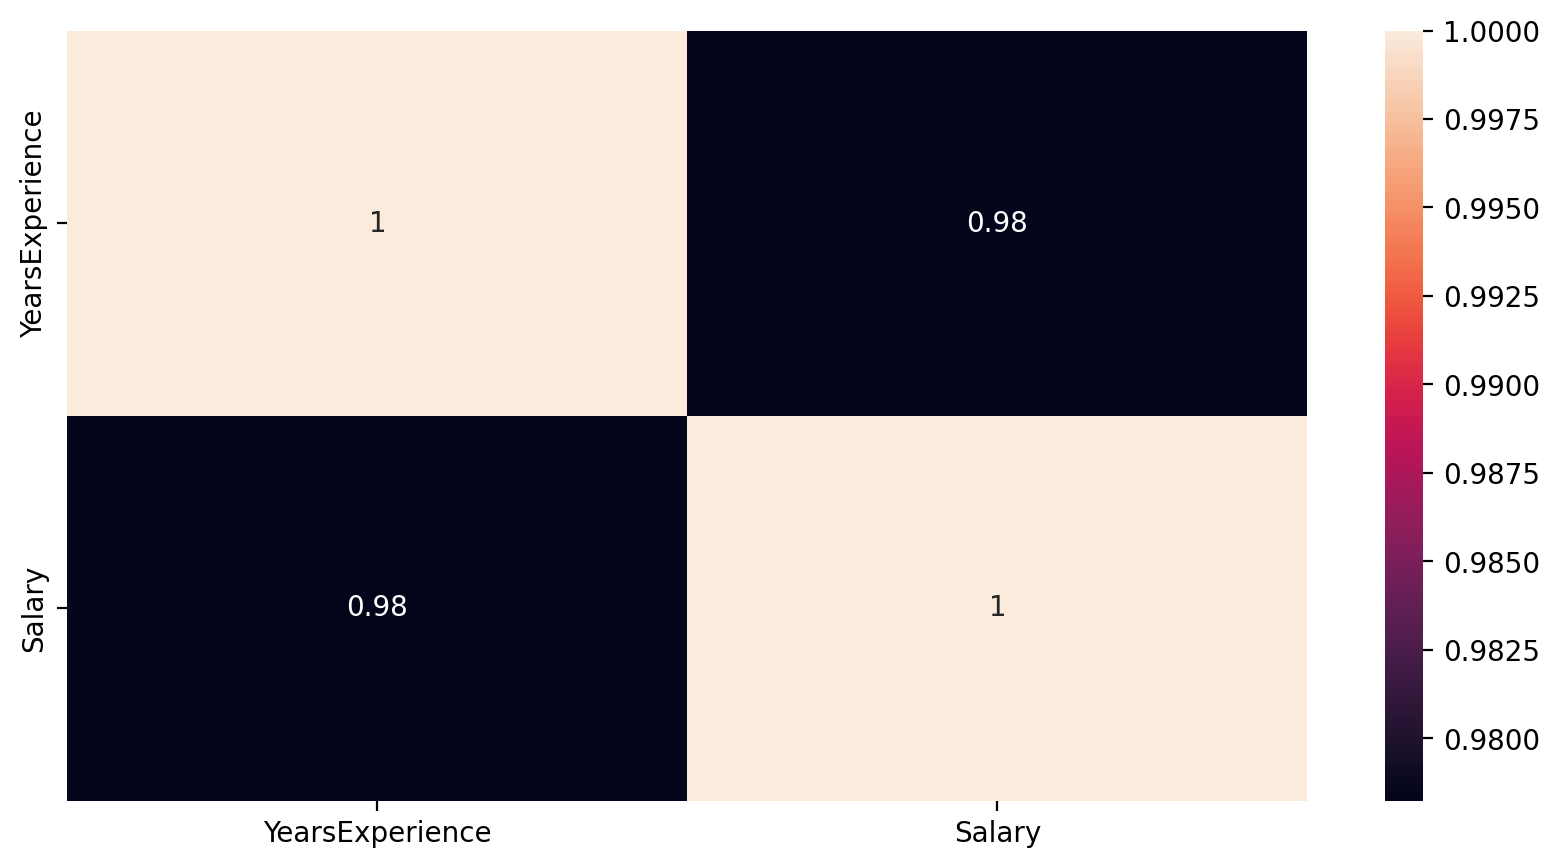

In [8]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

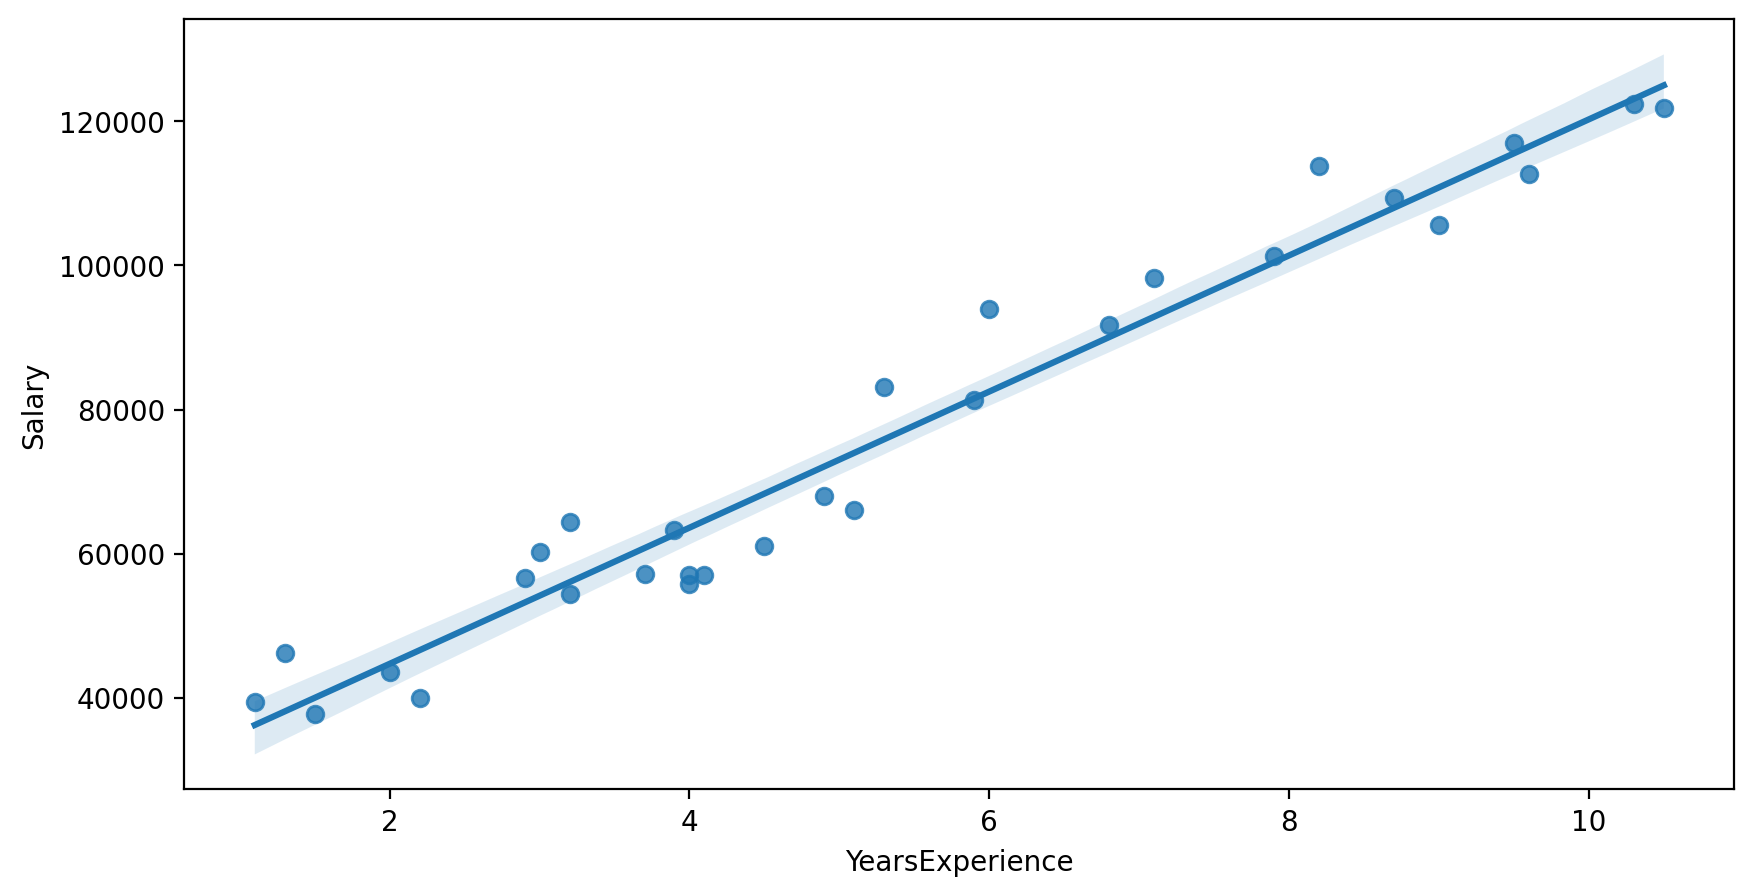

In [9]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])

### Model Building

In [10]:
model = smf.ols("Salary~YearsExperience",data=df).fit()

### Model Testing

In [11]:
# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [12]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [13]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

### Model Predictions

In [14]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [15]:
# Automatic Prediction for say 3 & 5 Years Experience 

In [16]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [17]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [18]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

# Data Transformation

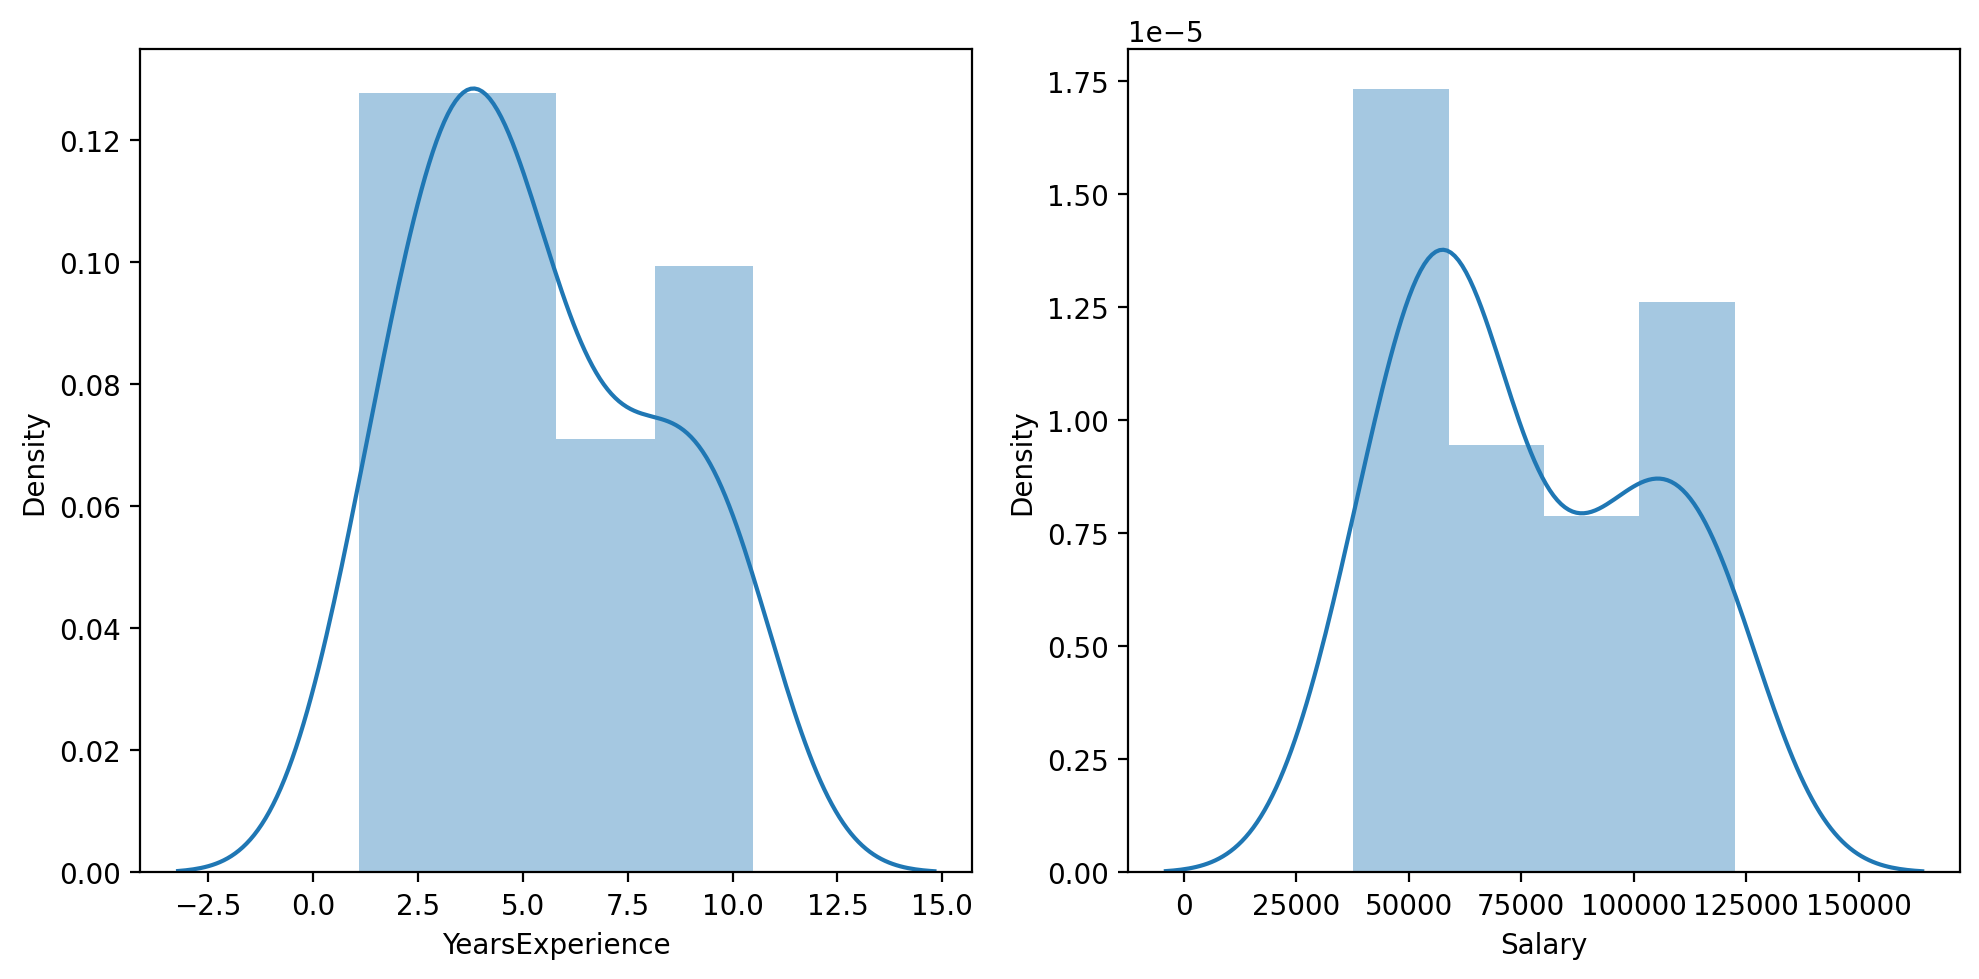

In [19]:
plt.subplot(1,2,1)
sns.distplot(df['YearsExperience'])

plt.subplot(1,2,2)
sns.distplot(df['Salary'])
plt.tight_layout()

### Log Transformation

In [20]:
df['log_YearsExperience'] = np.log(df['YearsExperience'])
df.head()

,YearsExperience,Salary,log_YearsExperience
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


In [21]:
df['log_Salary'] = np.log(df['Salary'])
df.head()

,YearsExperience,Salary,log_YearsExperience,log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906


<AxesSubplot:xlabel='log_Salary', ylabel='Density'>

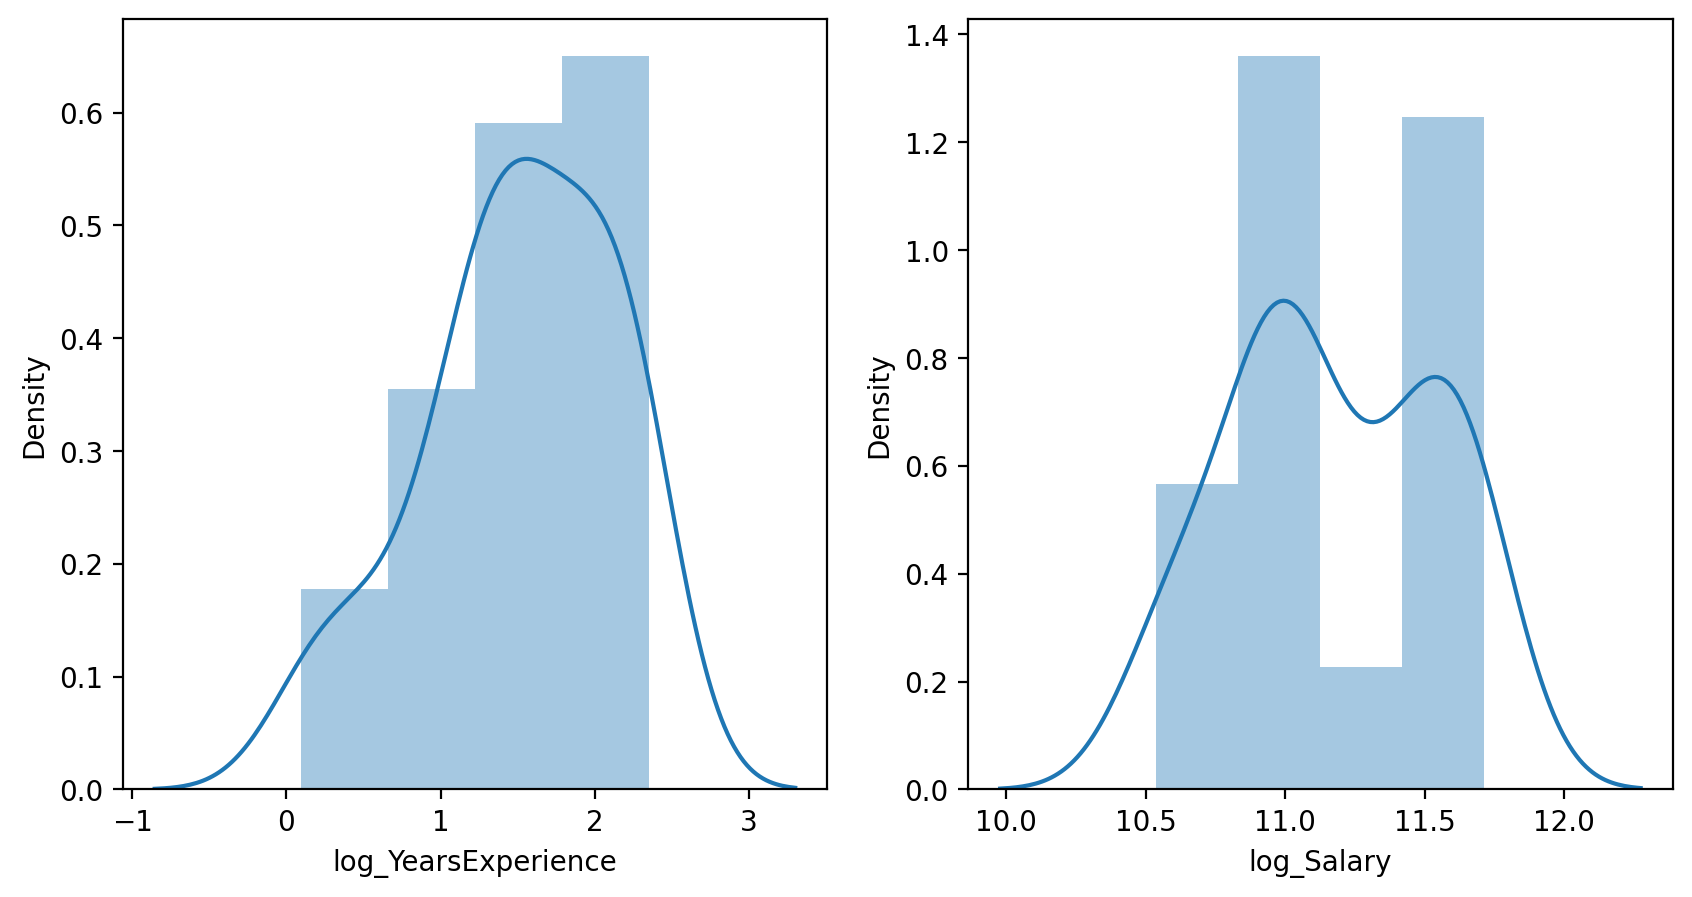

In [22]:
plt.subplot(1,2,1)
sns.distplot(df['log_YearsExperience'])

plt.subplot(1,2,2)
sns.distplot(df['log_Salary'])

In [23]:
df['log_YearsExperience'].skew()

-0.6005648582626513

### Sqrt Transformation

In [24]:
df['sqrt_Salary'] = np.sqrt(df['Salary'])
df.head()

,YearsExperience,Salary,log_YearsExperience,log_Salary,sqrt_Salary
0,1.1,39343.0,0.095310,10.580073,198.350700
1,1.3,46205.0,0.262364,10.740843,214.953483
2,1.5,37731.0,0.405465,10.538237,194.244691
3,2.0,43525.0,0.693147,10.681091,208.626460
4,2.2,39891.0,0.788457,10.593906,199.727314


<AxesSubplot:xlabel='sqrt_Salary', ylabel='Density'>

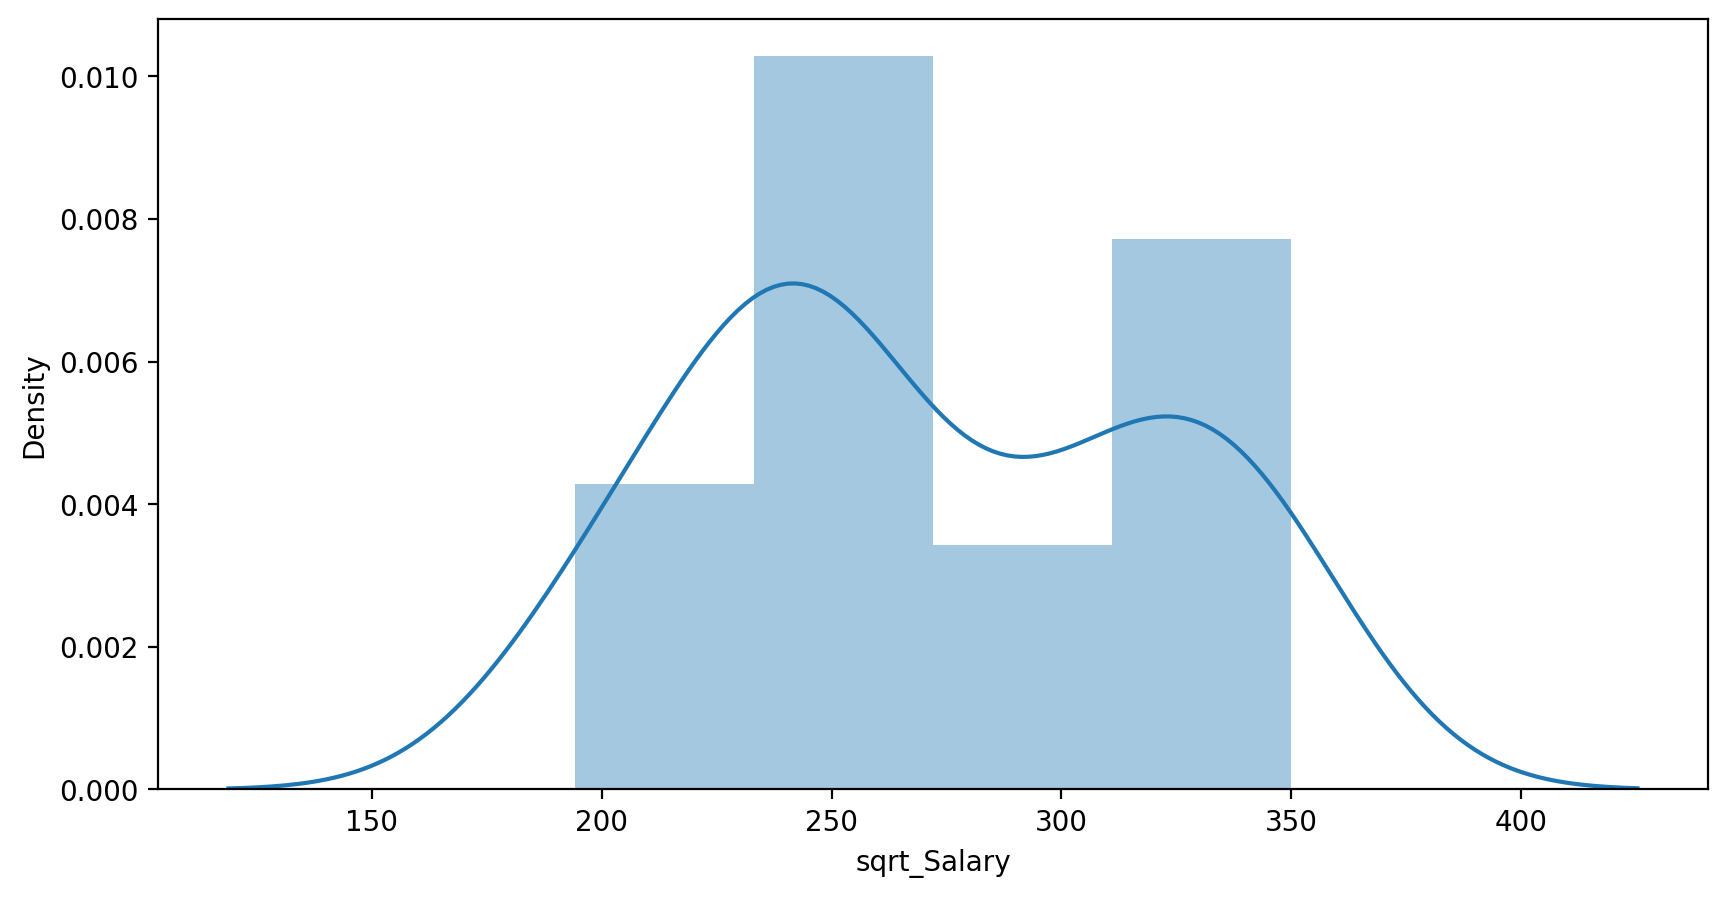

In [25]:
sns.distplot(df['sqrt_Salary'])

In [26]:
df['sqrt_Salary'].skew()

0.16904336802767353